In [24]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from statistics import median
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
data = pd.read_csv("flickr30k_images/results.csv", sep="|")
data.rename(columns={' comment': 'comment'}, inplace=True)
data.rename(columns={' comment_number': 'comment_number'}, inplace=True)

In [124]:
num_unique_images = data['image_name'].nunique()
print(f"Number of unique images: {num_unique_images}")
data.info()

Number of unique images: 31783
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158915 entries, 0 to 158914
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   image_name      158915 non-null  object
 1   comment_number  158915 non-null  object
 2   comment         158914 non-null  object
dtypes: object(3)
memory usage: 3.6+ MB


In [12]:
num_unique_images = data['image_name'].nunique()
print(f"Number of unique images: {num_unique_images}")

# Distribution of the number of comments per image
comments_per_image = data['image_name'].value_counts()
print(comments_per_image.describe())

Number of unique images: 31783
count    31783.0
mean         5.0
std          0.0
min          5.0
25%          5.0
50%          5.0
75%          5.0
max          5.0
Name: count, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


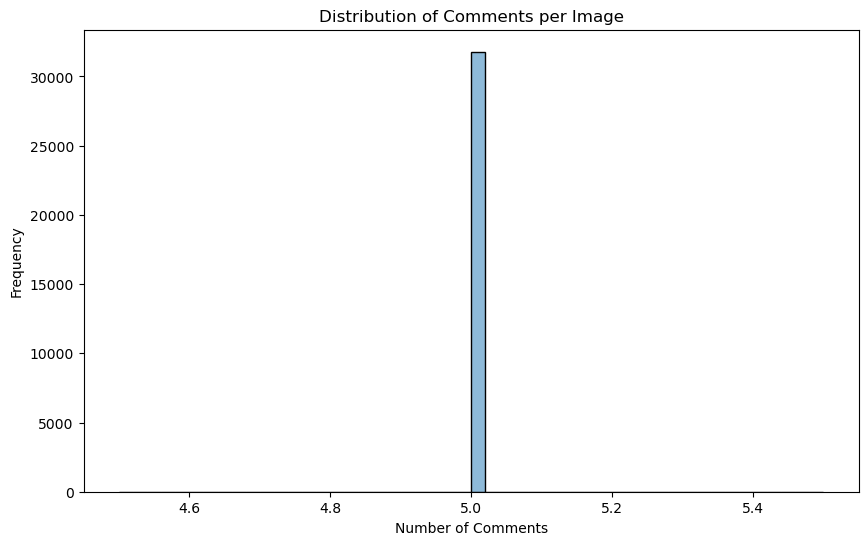

In [26]:
# Plot the distribution of comments per image
plt.figure(figsize=(10, 6))
sns.histplot(comments_per_image, bins=50, kde=True)
plt.title('Distribution of Comments per Image')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()

In [30]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
image_name        0
comment_number    0
comment           1
dtype: int64


In [39]:
# Fill missing comments with an empty string or handle appropriately
data['comment'].fillna('', inplace=True)

In [41]:
# Calculate comment lengths
data['comment_length'] = data['comment'].apply(len)

In [45]:
# Basic statistics of the comment lengths
print(data['comment_length'].describe())

count    158915.000000
mean         65.198483
std          26.869916
min           0.000000
25%          47.000000
50%          60.000000
75%          77.000000
max         407.000000
Name: comment_length, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


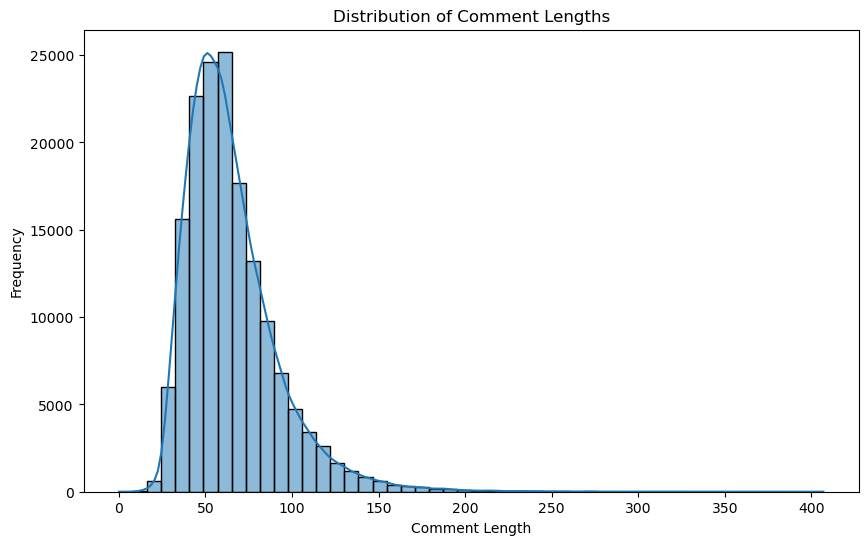

In [49]:
# Plot the distribution of comment lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['comment_length'], bins=50, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

In [53]:
# Sample few comments to get a sense of the text data
print(data['comment'].sample(10))

65163      A truck on a mound of dirt is backed up to a ...
104895     A whole lot of people are about to start a ra...
33194              A race car blows smoke while it drives .
51188      A woman sits at a desk and types on a computer .
33605      There is staging and men working on platform ...
107750     A man in a black jacket with black pants is w...
77409                     A child in a pink dress outside .
659               A multiracial couple posing for a picture
156944                    A man in a red hat bending over .
77311      Many people sit a table clothed tables eating...
Name: comment, dtype: object


In [55]:
# If you want to see some specific examples of images with their comments
image_example = data[data['image_name'] == data['image_name'].sample(1).iloc[0]]
print(image_example)

           image_name comment_number  \
58630  3170897628.jpg              0   
58631  3170897628.jpg              1   
58632  3170897628.jpg              2   
58633  3170897628.jpg              3   
58634  3170897628.jpg              4   

                                                 comment  comment_length  
58630   Two young boys playing with a soccer ball in ...              86  
58631   There are 2 shirtless boys jumping up from so...              81  
58632   A group of boys playing soccer in a muddy wet...              54  
58633       Two boys are playing soccer in a muddy marsh              45  
58634                 two boys play soccer in the rain .              35  


In [58]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [60]:
# Define the image path
image_path = 'flickr30k_images/flickr30k_images/flickr30k_images/'

# List all image files in the directory
image_files = [f for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]


In [62]:
# Number of images
num_images = len(image_files)
print(f"Number of images: {num_images}")

# Initialize lists to store image properties
image_formats = []
image_sizes = []
image_aspect_ratios = []
image_file_sizes = []

Number of images: 31783


In [64]:
# Loop through images and collect properties
for image_file in image_files:
    with Image.open(os.path.join(image_path, image_file)) as img:
        image_formats.append(img.format)
        image_sizes.append(img.size)
        image_aspect_ratios.append(img.size[0] / img.size[1])
        image_file_sizes.append(os.path.getsize(os.path.join(image_path, image_file)))


In [66]:
# Create a DataFrame to hold image properties
image_data = pd.DataFrame({
    'file_name': image_files,
    'format': image_formats,
    'size': image_sizes,
    'aspect_ratio': image_aspect_ratios,
    'file_size': image_file_sizes
})

In [68]:
# Display basic information
print(image_data.describe(include='all'))

             file_name format        size  aspect_ratio      file_size
count            31783  31783       31783  31783.000000   31783.000000
unique           31783      1         750           NaN            NaN
top     2609797461.jpg   JPEG  (500, 333)           NaN            NaN
freq                 1  31783        6421           NaN            NaN
mean               NaN    NaN         NaN      1.228410  138953.560929
std                NaN    NaN         NaN      0.354524   41035.536409
min                NaN    NaN         NaN      0.328000   10630.000000
25%                NaN    NaN         NaN      0.796000  111026.000000
50%                NaN    NaN         NaN      1.333333  136406.000000
75%                NaN    NaN         NaN      1.501502  164048.000000
max                NaN    NaN         NaN      4.464286  433840.000000


In [70]:
# Distribution of image formats
format_counts = Counter(image_formats)
print(f"Image format distribution: {format_counts}")

Image format distribution: Counter({'JPEG': 31783})


In [72]:
# Plot the distribution of image dimensions
image_data['width'] = image_data['size'].apply(lambda x: x[0])
image_data['height'] = image_data['size'].apply(lambda x: x[1])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


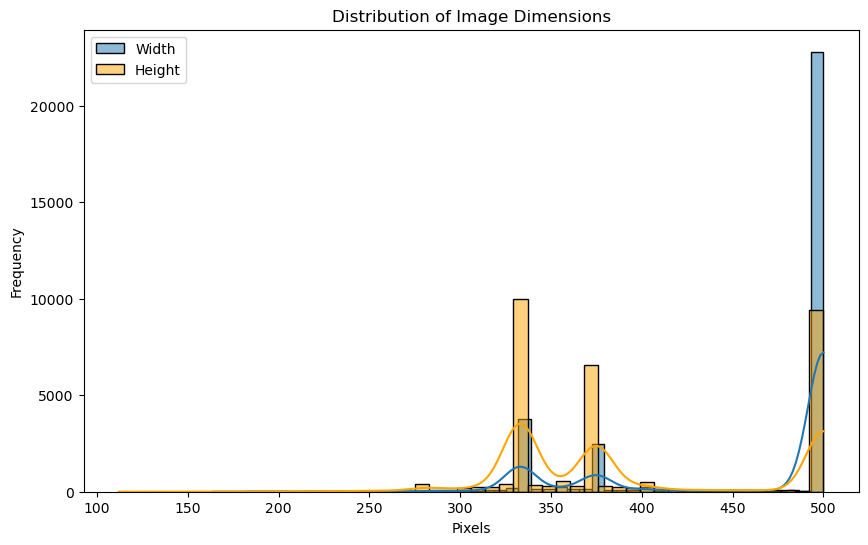

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(image_data['width'], bins=50, kde=True, label='Width')
sns.histplot(image_data['height'], bins=50, kde=True, label='Height', color='orange')
plt.title('Distribution of Image Dimensions')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


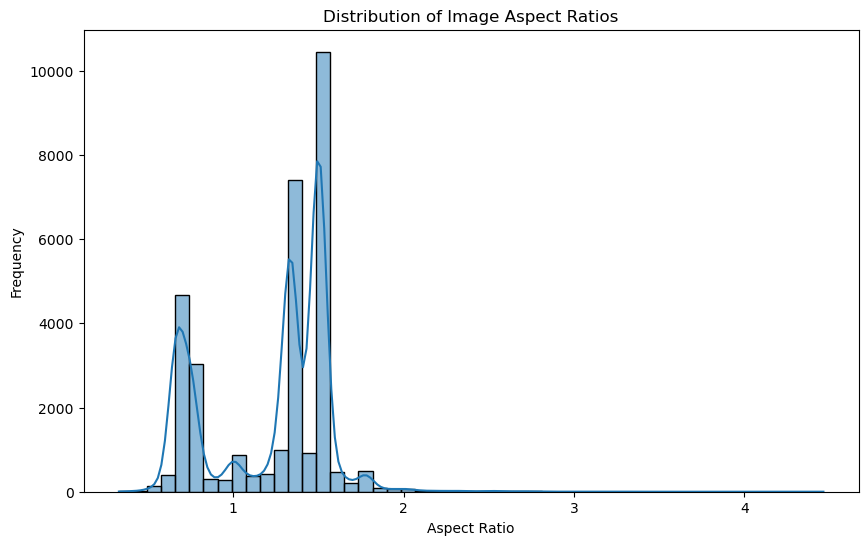

In [76]:
# Plot the distribution of image aspect ratios
plt.figure(figsize=(10, 6))
sns.histplot(image_data['aspect_ratio'], bins=50, kde=True)
plt.title('Distribution of Image Aspect Ratios')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


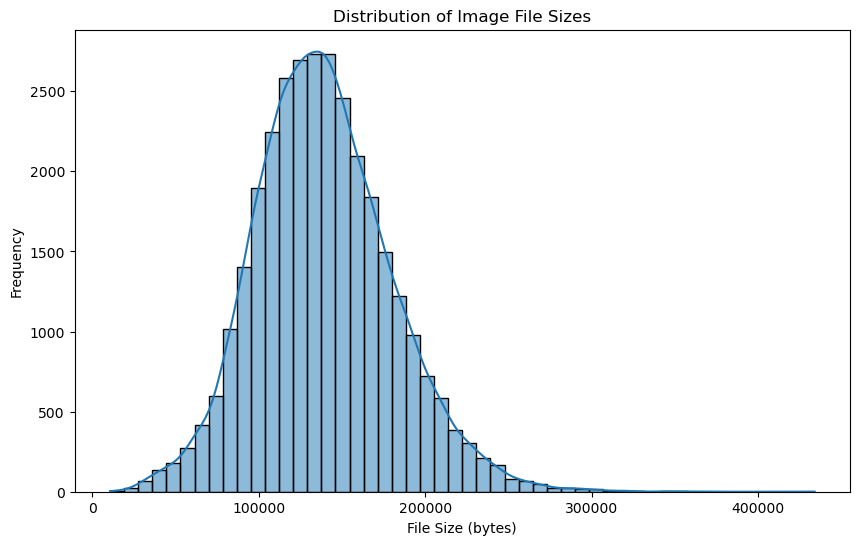

In [78]:
# Plot the distribution of image file sizes
plt.figure(figsize=(10, 6))
sns.histplot(image_data['file_size'], bins=50, kde=True)
plt.title('Distribution of Image File Sizes')
plt.xlabel('File Size (bytes)')
plt.ylabel('Frequency')
plt.show()

In [86]:
# Display a few sample images
sample_images = image_data.sample(5)

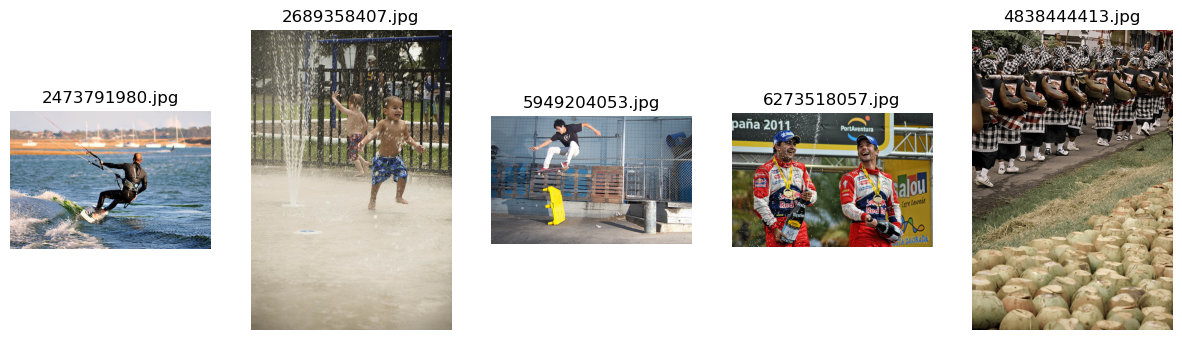

In [88]:
plt.figure(figsize=(15, 10))
for i, row in enumerate(sample_images.itertuples()):
    img = Image.open(os.path.join(image_path, row.file_name))
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(row.file_name)
    plt.axis('off')
plt.show()

[('a', 181627), ('.', 151037), ('A', 90070), ('in', 83224), ('the', 57401), ('on', 45538), ('and', 44253), ('is', 41108), ('man', 40277), ('of', 38773), ('with', 36171), (',', 25331), ('woman', 21236), ('are', 20189), ('to', 17603), ('Two', 16446), ('at', 16157), ('wearing', 15694), ('people', 14148), ('white', 13039)]


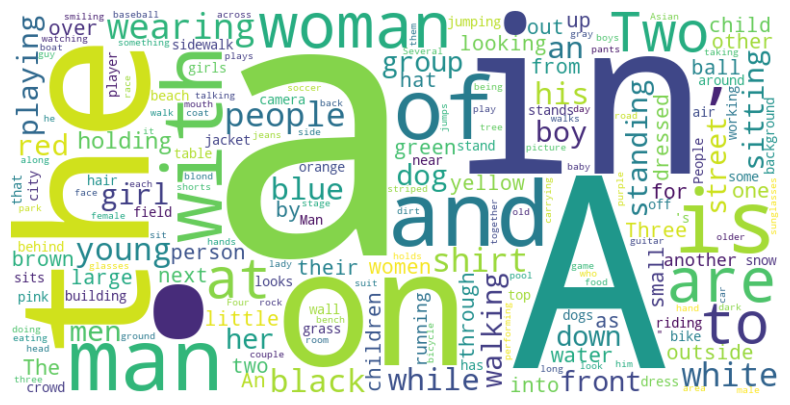

In [96]:
from collections import Counter
from wordcloud import WordCloud

# Combine all comments into one large string
all_comments = ' '.join(data['comment'].astype(str))

# Generate word frequency
word_counts = Counter(all_comments.split())

# Display the most common words
print(word_counts.most_common(20))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


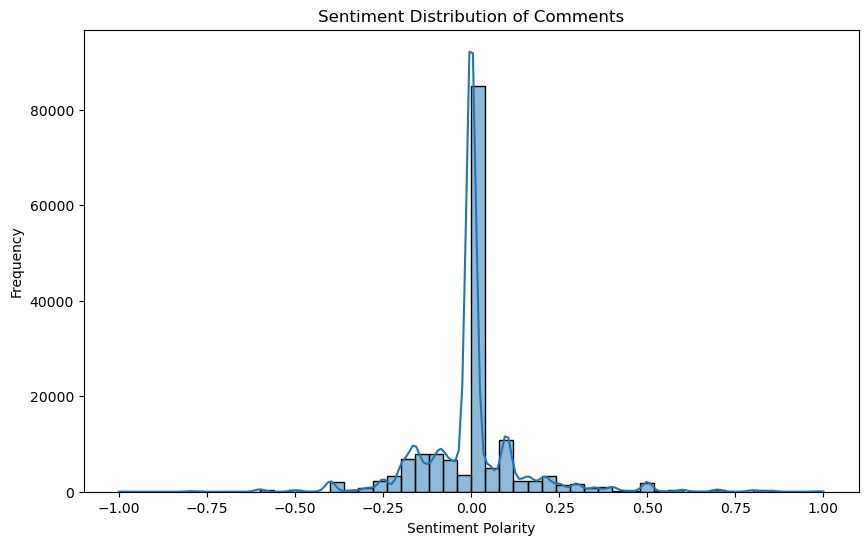

count    158915.000000
mean         -0.000415
std           0.150460
min          -1.000000
25%          -0.029167
50%           0.000000
75%           0.000000
max           1.000000
Name: sentiment, dtype: float64


In [104]:
from textblob import TextBlob

# Function to calculate sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis
data['sentiment'] = data['comment'].apply(get_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=50, kde=True)
plt.title('Sentiment Distribution of Comments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Basic statistics of the sentiment
print(data['sentiment'].describe())


Image: 181616579.jpg, Dominant Color: (48, 74, 46)


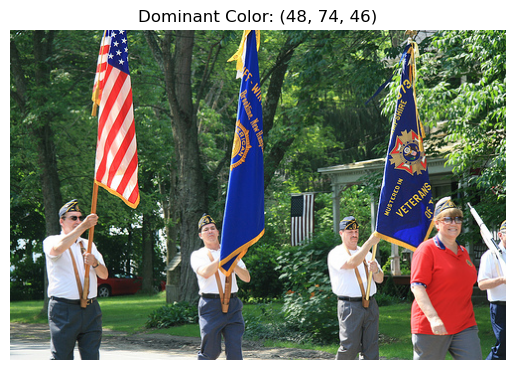

Image: 2216695423.jpg, Dominant Color: (19, 23, 20)


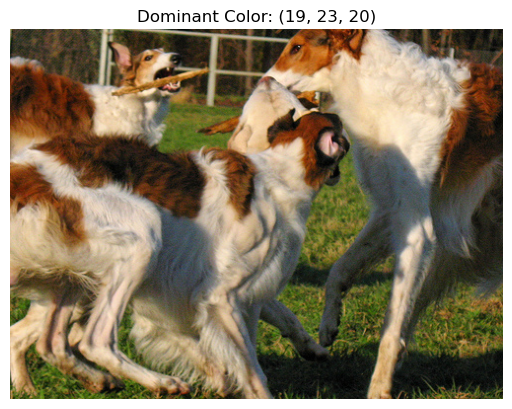

Image: 4630355820.jpg, Dominant Color: (0, 0, 0)


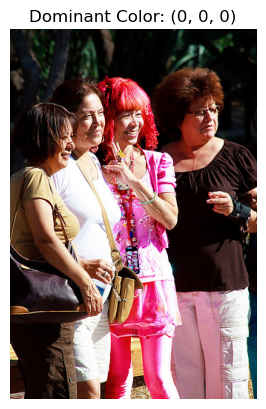

Image: 3036261575.jpg, Dominant Color: (0, 0, 0)


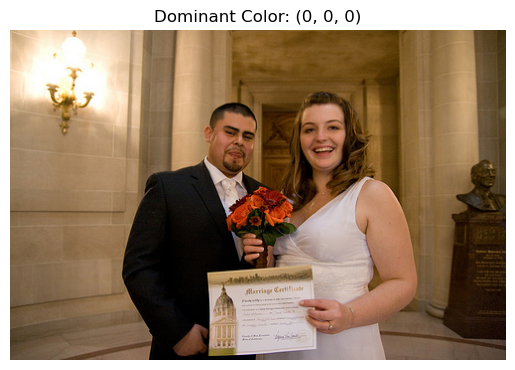

Image: 4941755026.jpg, Dominant Color: (15, 16, 18)


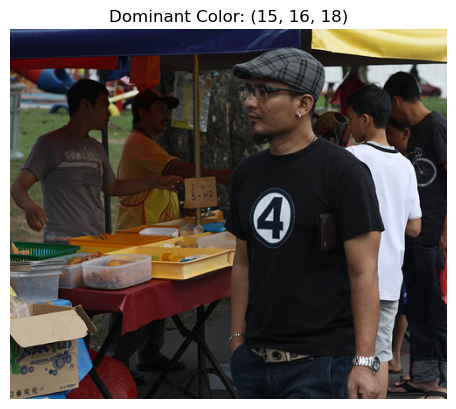

In [106]:
from PIL import Image
from collections import Counter
import numpy as np

def get_dominant_color(image):
    image = image.resize((50, 50))  # Resize to reduce computation
    pixels = np.array(image).reshape(-1, 3)
    most_common_color = Counter(map(tuple, pixels)).most_common(1)[0][0]
    return most_common_color

# Sample image analysis
sample_images = image_data.sample(5)

for row in sample_images.itertuples():
    img = Image.open(os.path.join(image_path, row.file_name))
    dominant_color = get_dominant_color(img)
    print(f"Image: {row.file_name}, Dominant Color: {dominant_color}")
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Dominant Color: {dominant_color}")
    plt.show()


In [110]:
# Identify duplicate captions
duplicate_captions = data[data.duplicated(subset=['comment'], keep=False)]

# Number of duplicate captions
num_duplicate_captions = duplicate_captions.shape[0]
print(f"Number of duplicate captions: {num_duplicate_captions}")

# Display some examples of duplicate captions
print(duplicate_captions.head())


Number of duplicate captions: 855
          image_name comment_number  \
172   1009434119.jpg              2   
308    101654506.jpg              3   
664    104285082.jpg              4   
843   1056249424.jpg              3   
1279   108957912.jpg              4   

                                                comment  comment_length  \
172    A black and white dog is running through the ...              53   
308                        A dog running through snow .              29   
664                A man playing a musical instrument .              37   
843             The children are playing in the water .              40   
1279                    People crossing a city street .              32   

      sentiment  
172   -0.083333  
308    0.000000  
664    0.000000  
843    0.000000  
1279   0.000000  


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

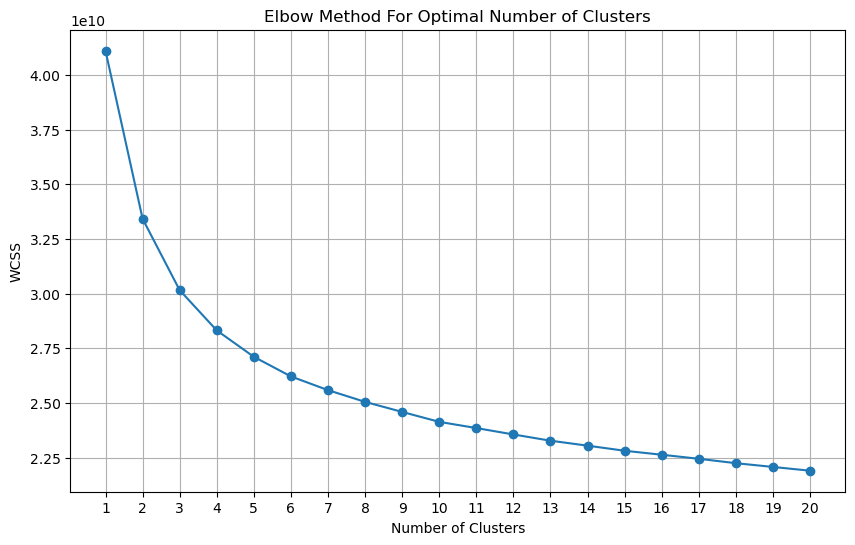

In [116]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

# Define the image path
image_path = 'flickr30k_images/flickr30k_images/flickr30k_images/'

# List all image files in the directory
image_files = [f for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]

# Sample a subset of images for clustering (using a smaller sample for efficiency)
sample_size = 1000
sample_image_files = np.random.choice(image_files, sample_size, replace=False)

def flatten_image(image):
    return np.array(image).flatten()

# Load and flatten the sample images
sample_image_arrays = [flatten_image(Image.open(os.path.join(image_path, f)).resize((64, 64))) for f in sample_image_files]

# Perform PCA to reduce dimensionality
pca = PCA(n_components=50)
pca_result = pca.fit_transform(sample_image_arrays)

# Function to calculate WCSS for different number of clusters
def calculate_wcss(data):
    wcss = []
    for n in range(1, 21):
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Calculate WCSS for PCA-reduced data
wcss = calculate_wcss(pca_result)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


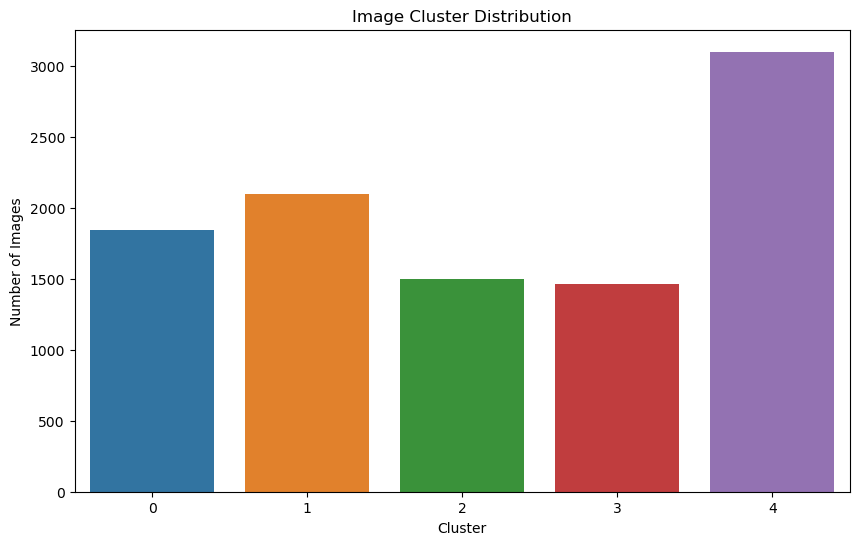

In [118]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

# Function to flatten image to 1D array
def flatten_image(image):
    return np.array(image).flatten()

# Sample a subset of images for clustering
sample_size = 10000
sample_images = image_data.sample(sample_size)
sample_image_files = [os.path.join(image_path, fname) for fname in sample_images['file_name']]
sample_image_arrays = [flatten_image(Image.open(f).resize((64, 64))) for f in sample_image_files]

# Perform PCA to reduce dimensionality
pca = PCA(n_components=50)
pca_result = pca.fit_transform(sample_image_arrays)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(pca_result)
sample_images['cluster'] = kmeans.labels_

# Plot clustering result
plt.figure(figsize=(10, 6))
sns.countplot(x=sample_images['cluster'])
plt.title('Image Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Images')
plt.show()
